Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


3. In your chosen state, which of the lessons are the students more successful, math or reading?


4. What are the distributions of the math and reading scores in the sample?



5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


In [116]:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore





warnings.filterwarnings('ignore')

In [117]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [118]:
Pa1_edu_df = edu_df.loc[lambda edu_df : edu_df['STATE'] == 'PENNSYLVANIA' ].sort_values(by=['YEAR'])
Pa1_edu_df.tail()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1135,2013_PENNSYLVANIA,PENNSYLVANIA,2013,1623694.0,28484645.0,2049113.0,9764558.0,16670974.0,28495118.0,15456205.0,7737010.0,1178563.0,1501024.0,8499.0,129360.0,132216.0,137287.0,135583.0,1063310.0,554067.0,1625876.0,244.012620,289.623652,226.402324,269.086973
1186,2014_PENNSYLVANIA,PENNSYLVANIA,2014,1605292.0,29068069.0,1812609.0,10272392.0,16983068.0,28620630.0,15352999.0,7889064.0,1163079.0,1566997.0,8106.0,127398.0,129927.0,135683.0,131694.0,1058258.0,549398.0,1615762.0,NaN,NaN,NaN,NaN
1237,2015_PENNSYLVANIA,PENNSYLVANIA,2015,1589429.0,29967185.0,1857885.0,10532452.0,17576848.0,29690645.0,16058338.0,8196747.0,1050310.0,1663209.0,8201.0,120874.0,130671.0,131505.0,129921.0,1047793.0,540546.0,1596540.0,243.312240,283.668415,226.670774,262.673146
150,2016_PENNSYLVANIA,PENNSYLVANIA,2016,1572593.0,31077289.0,1904293.0,11181046.0,17991950.0,30925177.0,16717308.0,8464573.0,1079198.0,1793713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1349,2017_PENNSYLVANIA,PENNSYLVANIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.672327,286.393832,224.924702,266.216684


In [119]:
og_edu_df = edu_df

columnlist= [ 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']


for column in columnlist:
    edu_df.loc[:, column] = edu_df.loc[:, column].fillna(edu_df.loc[:, column].interpolate(method='linear'))


for column in columnlist:
    edu_df.loc[:, column] = edu_df.loc[:, column].fillna(edu_df.loc[:, column].mean())

#edu4_df.interpolate(method='linear')

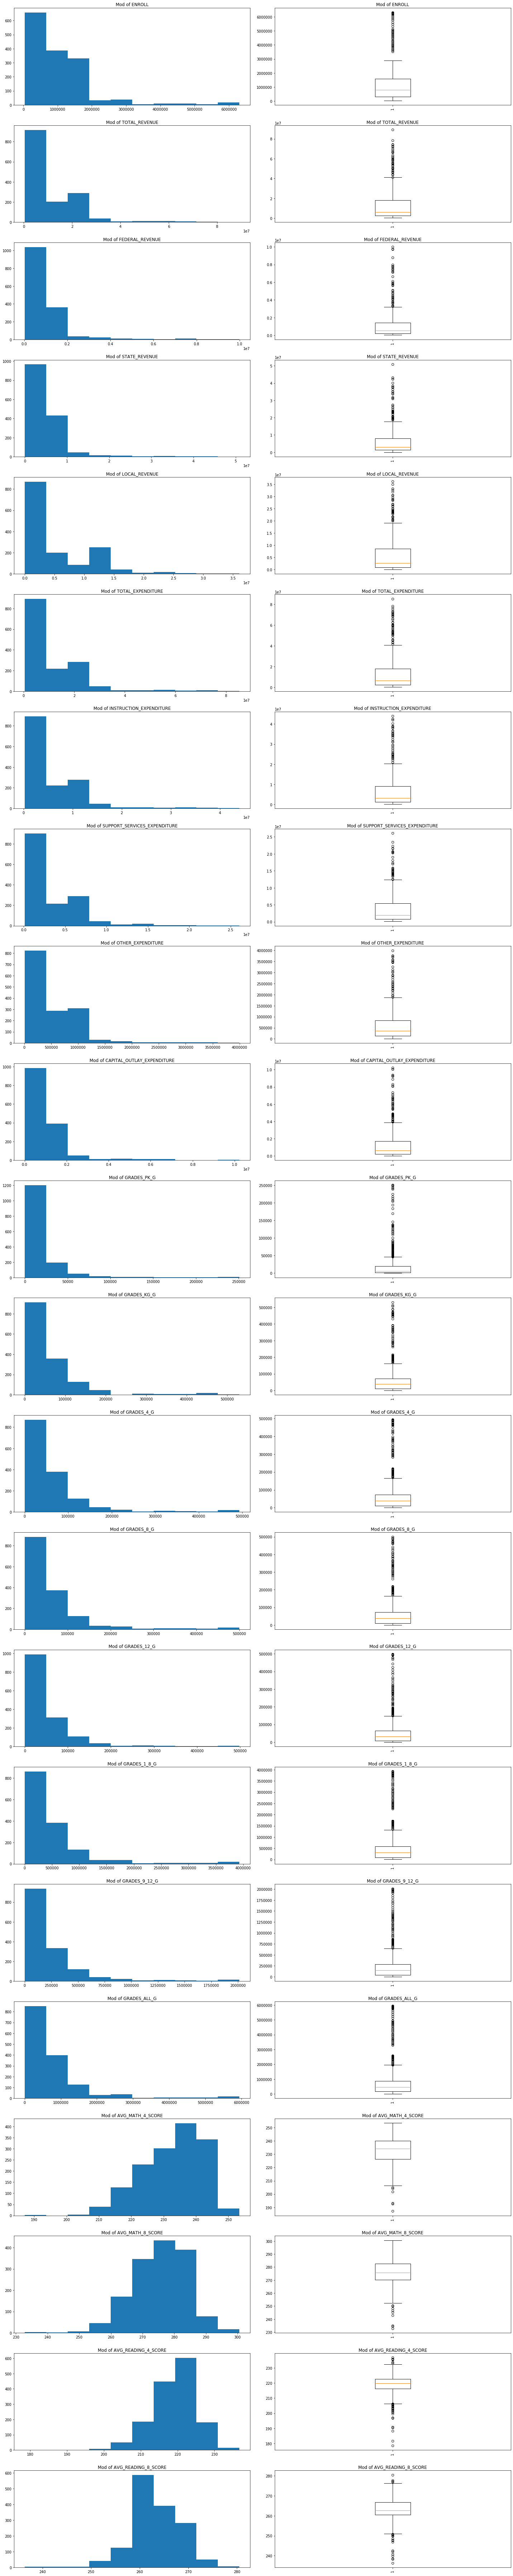

In [112]:
fig = plt.figure(figsize=(20,100))
for n, column in enumerate (columnlist):
    dataframe = edu_df[column]
    p=(n+1)*2
    plt.subplot(len(columnlist),2,p-1)
    plt.hist(edu_df[column])
    plt.title("Mod of {}".format(column))

    plt.subplot(len(columnlist),2,p)
    plt.boxplot(edu_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

In [26]:
edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


OptionError: "No such keys(s): 'display.height'"

In [58]:
pd.set_option('display.max_columns', 500)

edu_df.describe()


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,1.033524e+06,15926.059316,59021.465818,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.267799
std,7.393983,9.969002e+05,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.190029e+05,1.272901e+06,28669.479212,78271.025323,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.977122
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.113398e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.309174e+05,2.163398e+05,1544.000000,9926.750000,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.490867
50%,2004.000000,7.992530e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.563930e+05,6.436235e+05,5910.500000,38507.000000,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.625738
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.308385e+05,1.717212e+06,19561.000000,70748.750000,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.847503
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.



In [56]:
#pd.set_option(optname, val)
#<opt.hierarchical.name> = val

#import pandas as pd
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [52]:
Pa_edu_df = edu_df.loc[lambda edu_df : edu_df['STATE'] == 'PENNSYLVANIA' ].sort_values(by=['YEAR'])


In [53]:
Pa_edu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,26.000000,26.000000,2.600000e+01,26.000000,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,1.654145e+06,2.148876e+07,1.513287e+06,7.624542e+06,1.235093e+07,2.187297e+07,1.099316e+07,6.107699e+06,8.620983e+05,...,124942.057692,129686.173077,118660.250000,1.012251e+06,517670.269231,1.536647e+06,231.518228,274.590918,219.059372,262.737927
std,7.648529,3.025114e+05,6.275477e+06,6.991408e+05,2.032939e+06,3.674285e+06,6.050356e+06,3.059127e+06,1.711030e+06,2.752789e+05,...,33269.757355,35052.202636,33978.312222,2.691622e+05,143330.960969,4.101406e+05,9.295673,8.421052,5.111674,4.927089
min,1992.000000,2.093369e+05,1.125725e+07,6.581390e+05,4.227323e+06,6.371790e+06,1.153925e+07,6.075381e+06,3.329224e+06,6.472094e+04,...,4471.000000,3263.000000,1675.000000,3.420250e+04,8965.000000,4.575850e+04,212.776708,258.115798,208.822865,251.033331
25%,1998.250000,1.651283e+06,1.584400e+07,8.722292e+05,5.828791e+06,9.142982e+06,1.660314e+07,8.400434e+06,4.452145e+06,6.825225e+05,...,130611.750000,135619.250000,114995.250000,1.062127e+06,529574.500000,1.617998e+06,224.637217,270.230804,215.395989,260.502153
50%,2004.500000,1.731190e+06,2.188090e+07,1.645862e+06,7.431643e+06,1.255243e+07,2.261937e+07,1.099001e+07,6.444738e+06,8.900125e+05,...,132214.500000,136923.500000,128407.500000,1.079708e+06,552359.500000,1.650496e+06,232.384692,273.057642,218.773910,262.024385
75%,2010.750000,1.763200e+06,2.760007e+07,1.848784e+06,9.392661e+06,1.547095e+07,2.772111e+07,1.328286e+07,7.676092e+06,1.091128e+06,...,137565.000000,143580.000000,136212.250000,1.111604e+06,581711.750000,1.681258e+06,239.416477,280.169816,222.705977,266.524865
max,2017.000000,1.791100e+06,3.107729e+07,3.371827e+06,1.118105e+07,1.799195e+07,3.092518e+07,1.671731e+07,8.464573e+06,1.207139e+06,...,142366.000000,151250.000000,153112.000000,1.130386e+06,648688.000000,1.739787e+06,245.654910,289.623652,227.236463,269.774052


In [80]:
edu_df["YEAR"].sort_values().unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

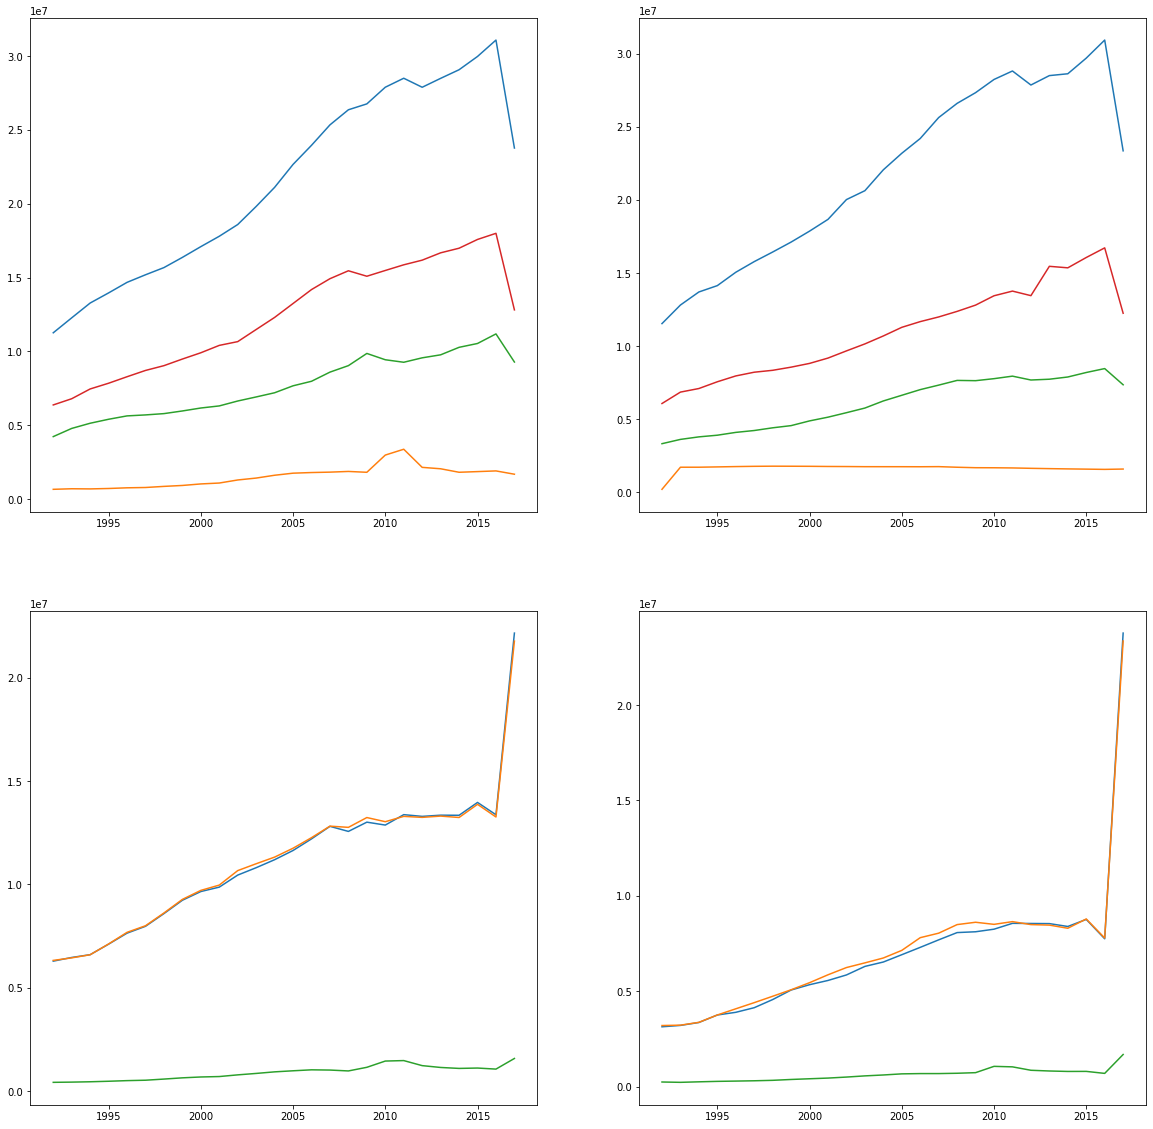

In [104]:

plt.figure(figsize=(20,20))

year = edu_df["YEAR"].sort_values().unique()
avgrev = edu_df['TOTAL_REVENUE'].groupby(edu_df['YEAR']).mean()
avgexp = edu_df['TOTAL_EXPENDITURE'].groupby(edu_df['YEAR']).mean()
avgfedrev = edu_df['FEDERAL_REVENUE'].groupby(edu_df['YEAR']).mean()

medrev = edu_df['TOTAL_REVENUE'].groupby(edu_df['YEAR']).median()
medexp = edu_df['TOTAL_EXPENDITURE'].groupby(edu_df['YEAR']).median()
medfedrev = edu_df['FEDERAL_REVENUE'].groupby(edu_df['YEAR']).median()

plt.subplot(2,2,1)
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['TOTAL_REVENUE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['FEDERAL_REVENUE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['STATE_REVENUE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['LOCAL_REVENUE']  )


plt.subplot(2,2,2)
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['TOTAL_EXPENDITURE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['ENROLL']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['SUPPORT_SERVICES_EXPENDITURE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['INSTRUCTION_EXPENDITURE']  )




plt.subplot(2,2,3)
plt.plot( year, avgrev  )
plt.plot( year, avgexp  )
plt.plot( year, avgfedrev  )

plt.subplot(2,2,4)
plt.plot( year, medrev  )

plt.plot( year, medexp  )
plt.plot( year, medfedrev  )


For Penssylvania there is a large drop in enrollment in 2017 this likely explaines the large drop in funding for schools if we do an analysis per student then we may get a different story

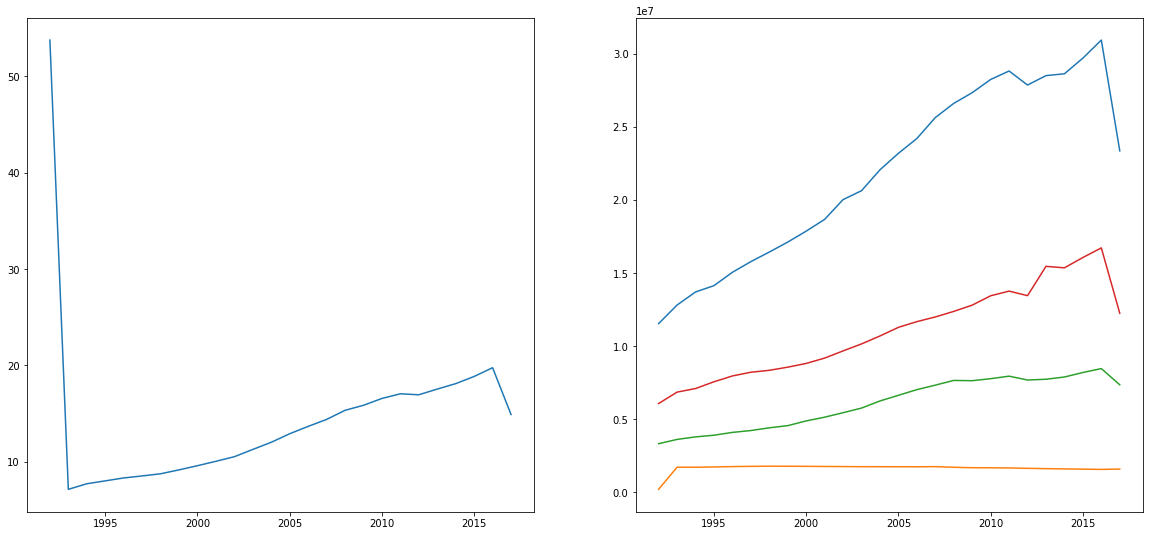

In [102]:
plt.figure(figsize=(20,20))

rev_per_student=  Pa_edu_df['TOTAL_REVENUE']/Pa_edu_df['ENROLL']

plt.subplot(2,2,1)
plt.plot( Pa_edu_df['YEAR'], rev_per_student  )

plt.subplot(2,2,2)
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['TOTAL_EXPENDITURE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['ENROLL']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['SUPPORT_SERVICES_EXPENDITURE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['INSTRUCTION_EXPENDITURE']  )


nope still looks like there was a large drop in spending per student in Pennsylvania. cant find much in the new about this. 


## 3. In your chosen state, which of the lessons are the students more successful, math or reading?


In [106]:
Pa_edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

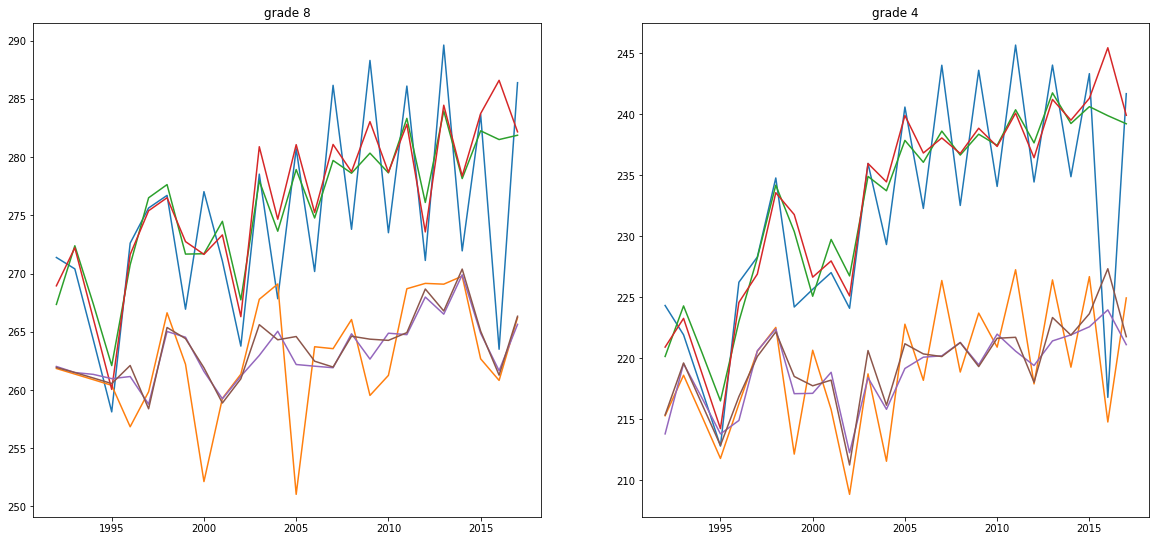

In [110]:
plt.figure(figsize=(20,20))

year = edu_df["YEAR"].sort_values().unique()
avg_math8 = edu_df['AVG_MATH_8_SCORE'].groupby(edu_df['YEAR']).mean()
avg_math4 = edu_df['AVG_MATH_4_SCORE'].groupby(edu_df['YEAR']).mean()
avg_read8 = edu_df['AVG_READING_8_SCORE'].groupby(edu_df['YEAR']).mean()
avg_read4 = edu_df['AVG_READING_4_SCORE'].groupby(edu_df['YEAR']).mean()

med_math8 = edu_df['AVG_MATH_8_SCORE'].groupby(edu_df['YEAR']).median()
med_math4 = edu_df['AVG_MATH_4_SCORE'].groupby(edu_df['YEAR']).median()
med_read8 = edu_df['AVG_READING_8_SCORE'].groupby(edu_df['YEAR']).median()
med_read4 = edu_df['AVG_READING_4_SCORE'].groupby(edu_df['YEAR']).median()

plt.subplot(2,2,1)
plt.title('grade 8')
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['AVG_MATH_8_SCORE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['AVG_READING_8_SCORE']  )
plt.plot( year, avg_math8  )
plt.plot( year, med_math8  )
plt.plot( avg_read8  )
plt.plot( year, med_read8  )


plt.subplot(2,2,2)
plt.title('grade 4' )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['AVG_MATH_4_SCORE']  )
plt.plot( Pa_edu_df['YEAR'], Pa_edu_df['AVG_READING_4_SCORE']  )
plt.plot( year, avg_math4  )
plt.plot( year, med_math4 )
plt.plot( year, avg_read4 )
plt.plot( year, med_read4  )



according to the chart students appear to be slightly better at math this could be further clarified by compairing scores to other states in 2017 however this could be atributed to noise and students could be decribed as average. conducting a statistical test on these valuse could provide more insight however a visual analysis suggests that students are about average with the rest of the country wil a larger amount of niose in their year to year fluctuations.  

## 4. What are the distributions of the math and reading scores in the sample?




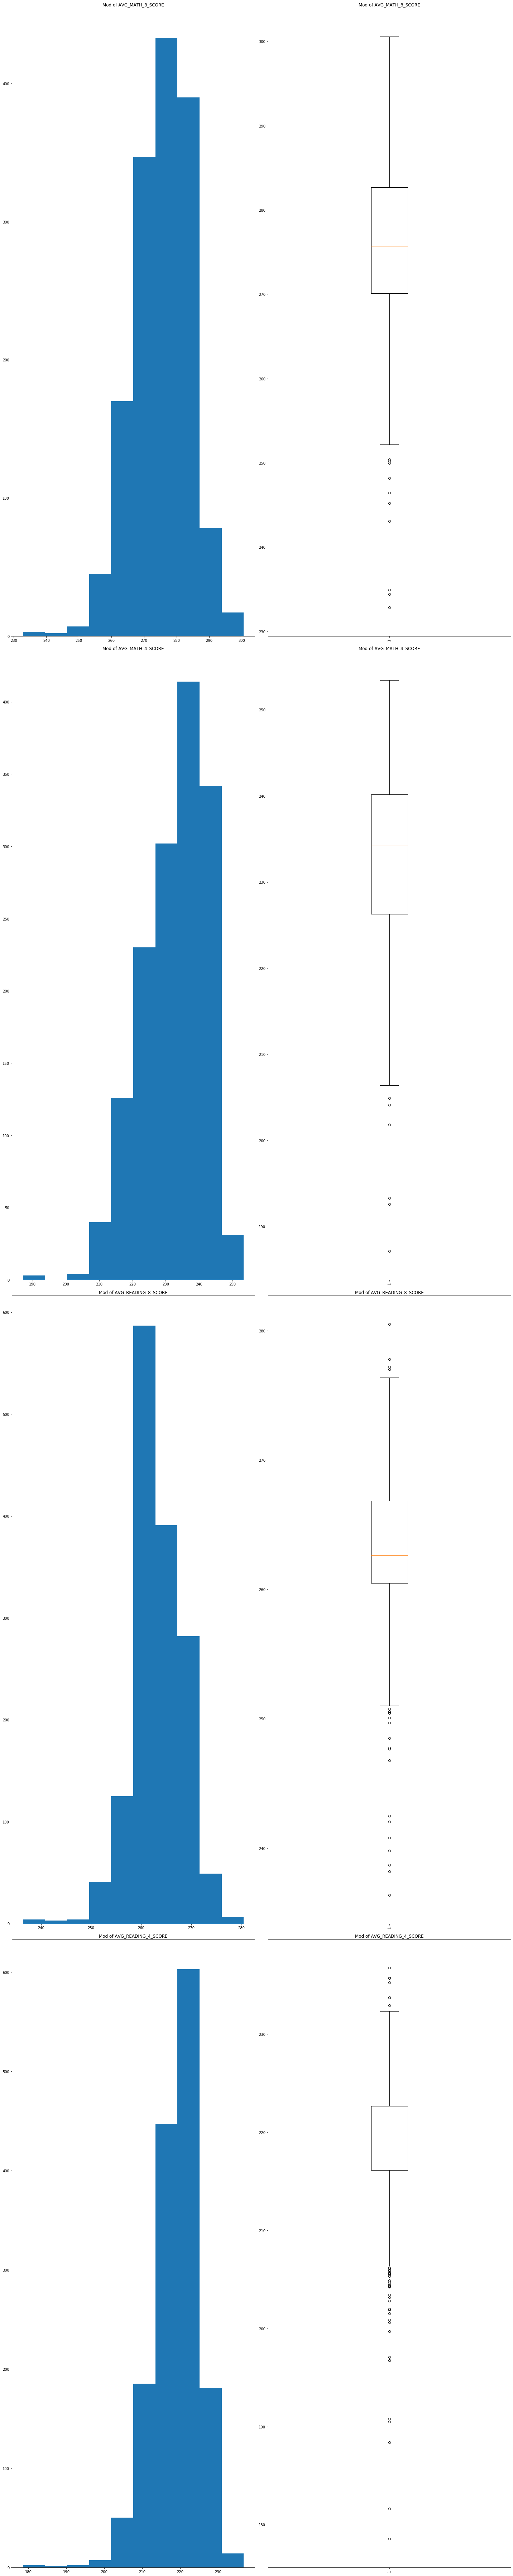

In [115]:

scores =['AVG_MATH_8_SCORE','AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE']

fig = plt.figure(figsize=(20,100))
for n, column in enumerate (scores):
    dataframe = edu_df[column]
    p=(n+1)*2
    plt.subplot(len(scores),2,p-1)
    plt.hist(edu_df[column])
    plt.title("Mod of {}".format(column))

    plt.subplot(len(scores),2,p)
    plt.boxplot(edu_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


In [122]:
edu_interp_df = og_edu_df
edu_mean_df = og_edu_df
edu_med_df = og_edu_df





scorelist= [ 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']


for column in scorelist:
    edu_interp_df.loc[:, column] = og_edu_df.loc[:, column].fillna(og_edu_df.loc[:, column].interpolate(method='linear'))

    edu_mean_df.loc[:, column] = og_edu_df.loc[:, column].fillna(og_edu_df.loc[:, column].mean())

    edu_med_df.loc[:, column] = og_edu_df.loc[:, column].fillna(og_edu_df.loc[:, column].median())

    
    

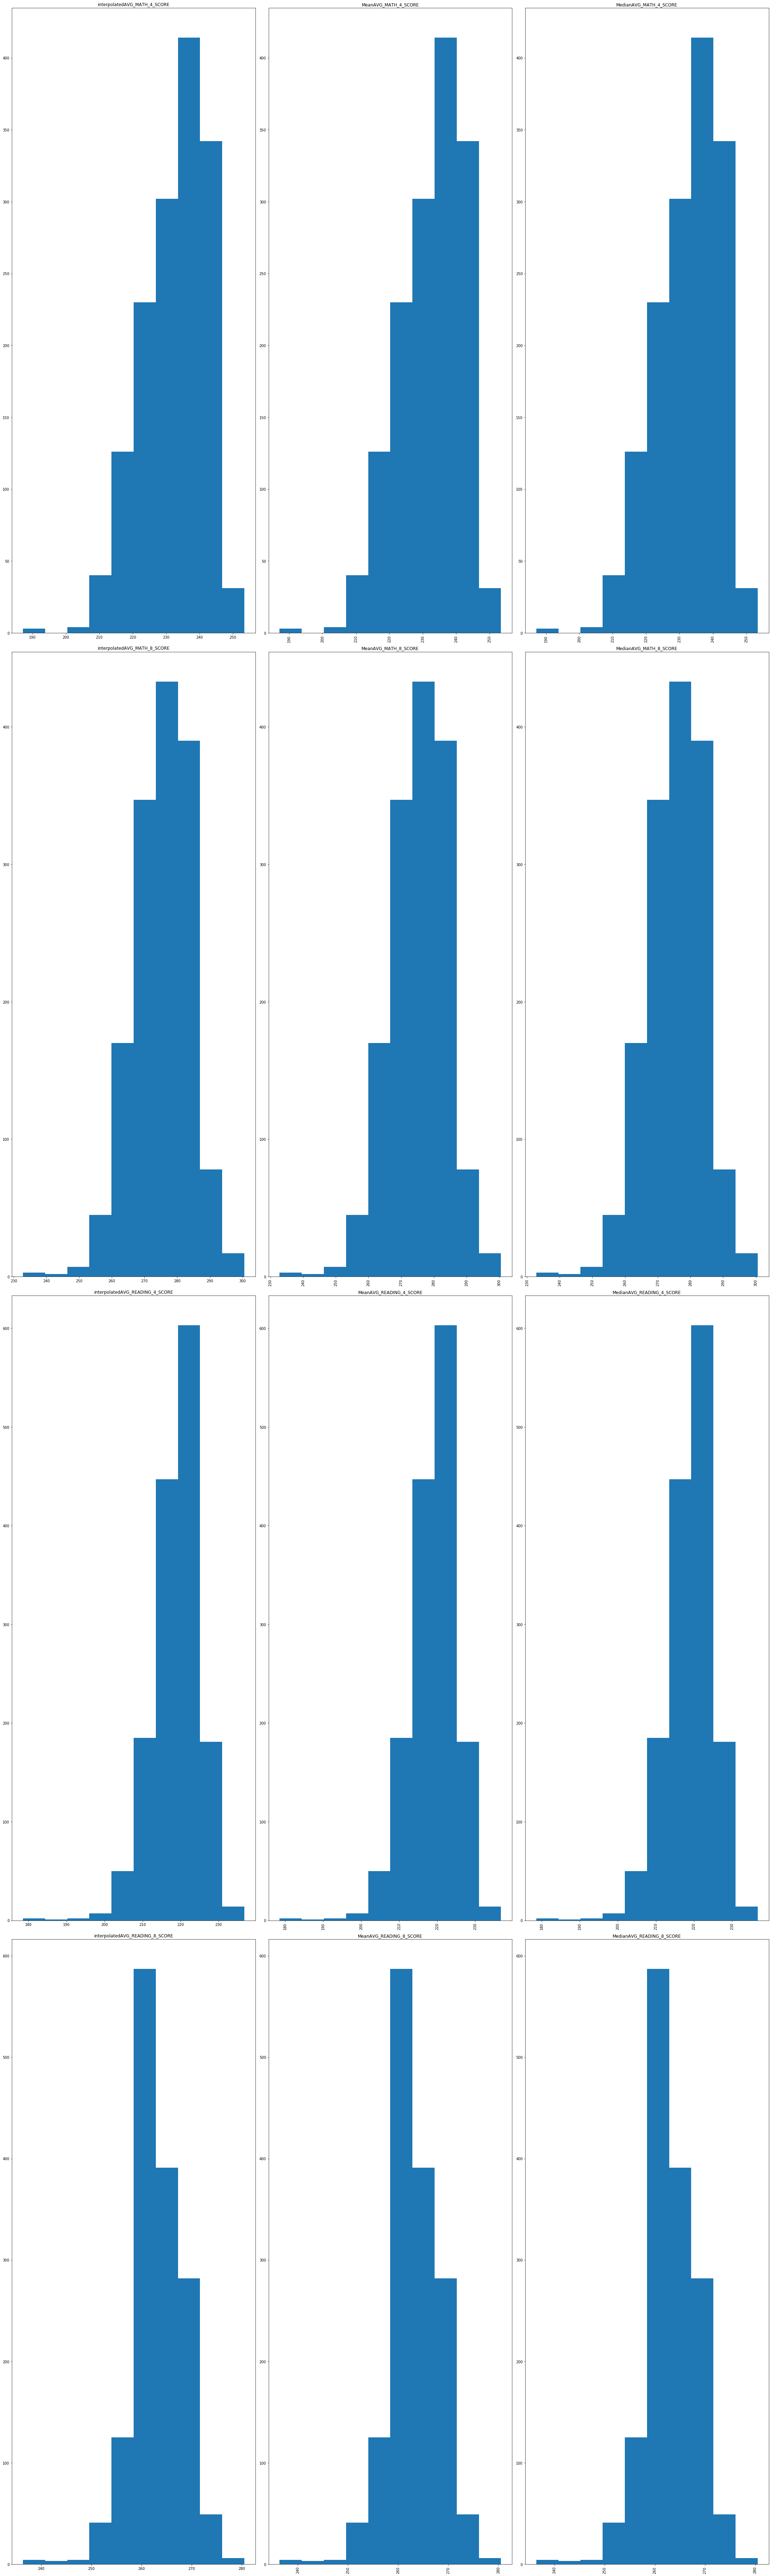

In [136]:

scorelist= [ 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

fig = plt.figure(figsize=(30,100))

for n, column in enumerate (scorelist):
    dataframe = edu_df[column]
    p=(n+1)*3
    plt.subplot(len(scorelist),3,p-2)
    plt.hist(edu_interp_df[column])
    plt.title("interpolated{}".format(column))

    plt.subplot(len(scorelist),3,p-1)
    plt.hist(edu_mean_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Mean{}".format(column))
    
    plt.subplot(len(scorelist),3,p)
    plt.hist(edu_med_df[column])
    plt.xticks(rotation='vertical')
    plt.title("Median{}".format(column))
    
    #3x9 grid of charts


plt.tight_layout()    
plt.show()

there seems to be very little difference between results 